<a href="https://colab.research.google.com/github/Dan-Blanchette/INBRE_Fellowship2023/blob/main/image_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.1 MB/s eta 0:00:00


In [8]:
from skimage import io
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import ipympl
import imageio.v3 as iio
from skimage import color
from skimage import filters
from skimage import measure

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
from google.colab import output
output.enable_custom_widget_manager()

In [21]:

path = '/content/drive/MyDrive/INBRE_Project_2023/test_data/013020_Lgalsbpb_GFPpos_NoTreatment_T01_XY1_Z10_RGB_Green.tif'

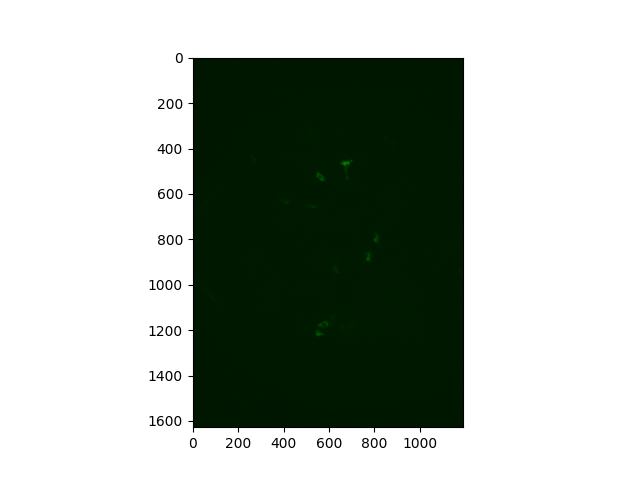

In [27]:
image = io.imread(path, plugin='pil')

plt.imshow(image)
plt.show()

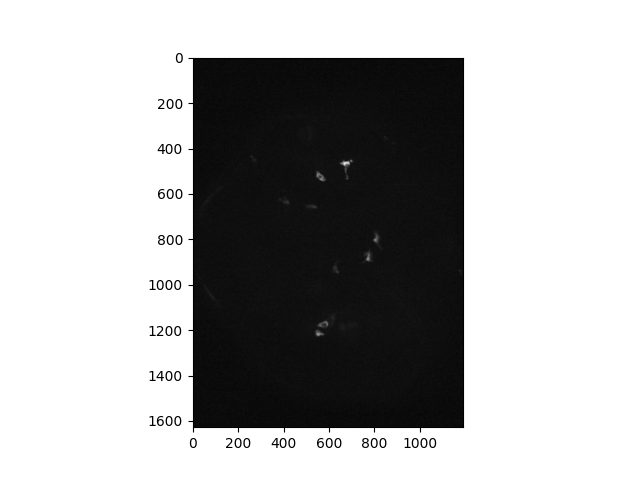

In [34]:
gray_img = color.rgb2gray(image)
blurred_img = filters.gaussian(gray_img, sigma=1.0)
plt.imshow(blurred_img, cmap='gray')
plt.show()

(0.0, 1.0)

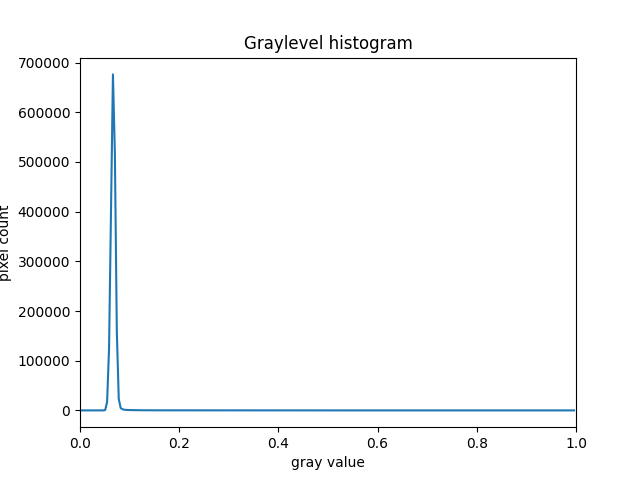

In [47]:
histogram, bin_edges = np.histogram(blurred_img, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)

threshold found at value: 0.12310989131754153


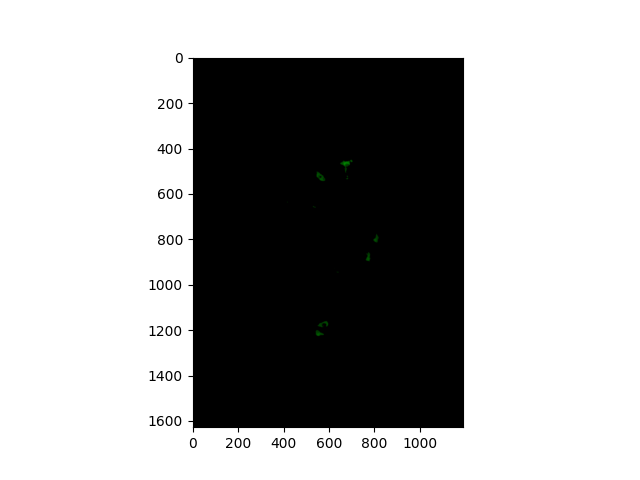

In [48]:
# use the binary_mask to select the "interesting" part of the image
t = filters.threshold_otsu(blurred_img)
print(f"threshold found at value: {t}")
binary_mask = blurred_img > t
selection = image.copy()
selection[~binary_mask] = 0
fig, ax = plt.subplots()
plt.imshow(selection)
plt.show()

Text(0.5, 1.0, 'bitmask applied to Image')

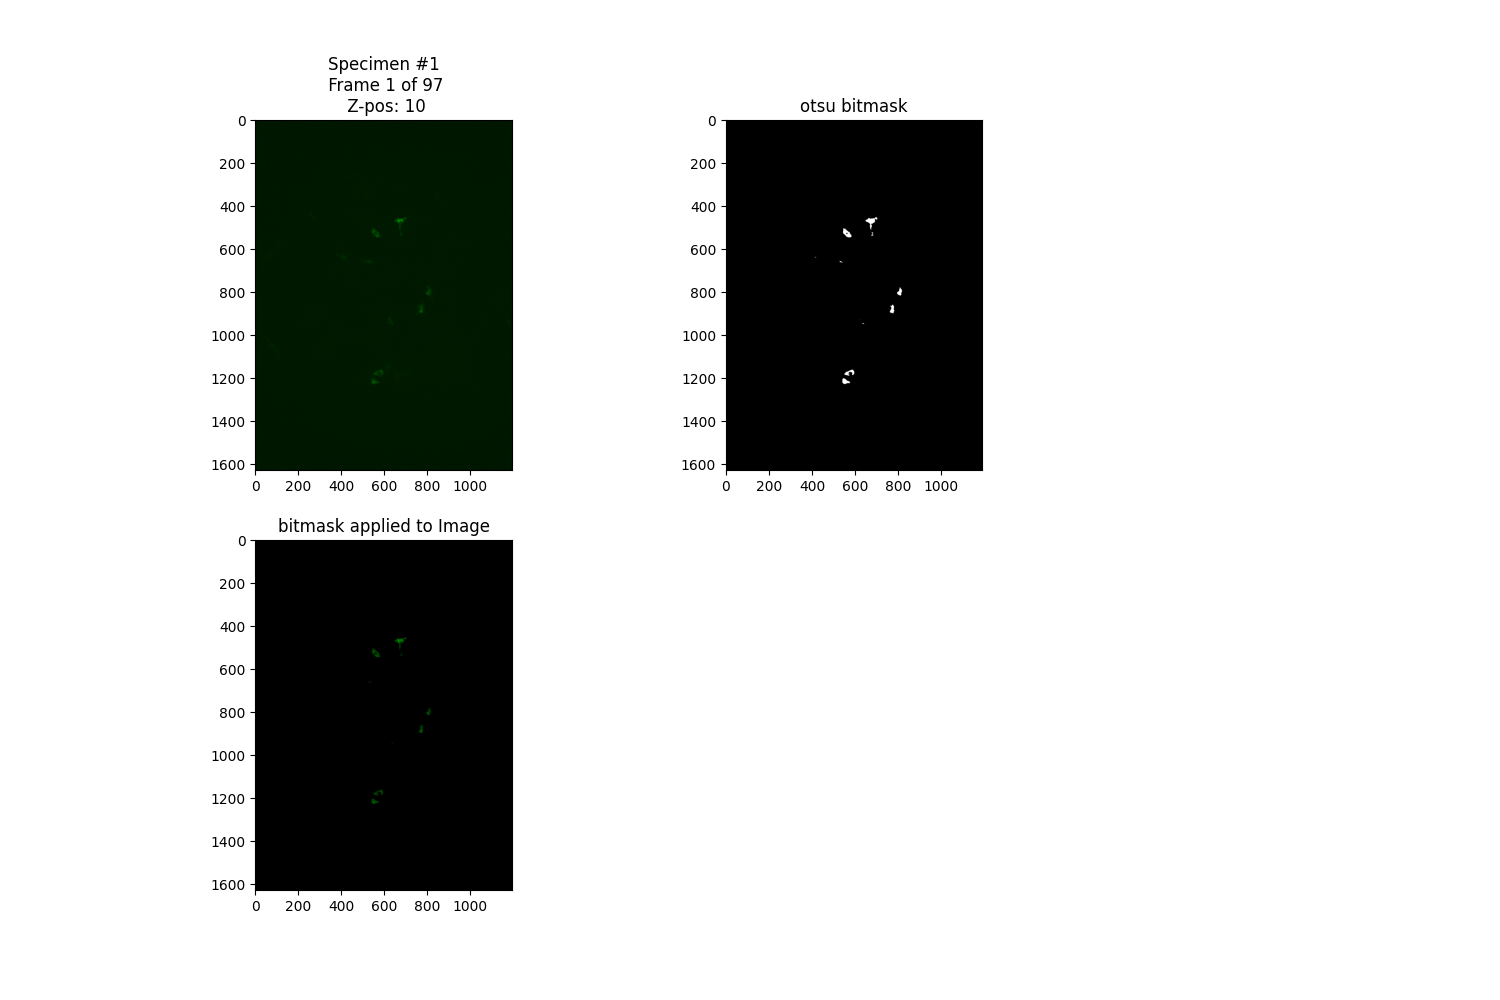

In [65]:
# display images
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(right=0.7)
rows=2
cols=2

fig.add_subplot(rows, cols, 1)
# display original image
plt.imshow(image)
plt.axis('on')
plt.title('Specimen #1\n Frame 1 of 97\n Z-pos: 10')

fig.add_subplot(rows, cols, 2)
# display original image
plt.imshow(binary_mask, cmap="gray")
plt.axis('on')
plt.title('otsu bitmask')

fig.add_subplot(rows, cols, 3)
# display original image
plt.imshow(selection)
plt.axis('on')
plt.title('bitmask applied to Image')

# #
# fig, ax = plt.subplots()
# plt.imshow(selection)

In [29]:
from google.colab import output
output.disable_custom_widget_manager()